In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/a-year-of-pumpkin-prices/chicago_9-24-2016_9-30-2017.csv
/kaggle/input/a-year-of-pumpkin-prices/columbia_9-24-2016_9-30-2017.csv
/kaggle/input/a-year-of-pumpkin-prices/baltimore_9-24-2016_9-30-2017.csv
/kaggle/input/a-year-of-pumpkin-prices/los-angeles_9-24-2016_9-30-2017.csv
/kaggle/input/a-year-of-pumpkin-prices/st-louis_9-24-2016_9-30-2017.csv
/kaggle/input/a-year-of-pumpkin-prices/dallas_9-24-2016_9-30-2017.csv
/kaggle/input/a-year-of-pumpkin-prices/atlanta_9-24-2016_9-30-2017.csv
/kaggle/input/a-year-of-pumpkin-prices/miami_9-24-2016_9-30-2017.csv
/kaggle/input/a-year-of-pumpkin-prices/san-fransisco_9-24-2016_9-30-2017.csv
/kaggle/input/a-year-of-pumpkin-prices/new-york_9-24-2016_9-30-2017.csv
/kaggle/input/a-year-of-pumpkin-prices/philadelphia_9-24-2016_9-30-2017.csv
/kaggle/input/a-year-of-pumpkin-prices/boston_9-24-2016_9-30-2017.csv
/kaggle/input/a-year-of-pumpkin-prices/detroit_9-24-2016_9-30-2017.csv


In [2]:
file_dir = '../input/a-year-of-pumpkin-prices'
!ls $file_dir
files = glob.glob(os.path.join(file_dir, "*.csv"))
dataframes = [pd.read_csv(file).assign(stock_ticker=os.path.basename(file).strip(".csv")) for file in files]
# Concatenate all the dataframes into one
df = pd.concat(dataframes, ignore_index=True)

atlanta_9-24-2016_9-30-2017.csv    los-angeles_9-24-2016_9-30-2017.csv
baltimore_9-24-2016_9-30-2017.csv  miami_9-24-2016_9-30-2017.csv
boston_9-24-2016_9-30-2017.csv	   new-york_9-24-2016_9-30-2017.csv
chicago_9-24-2016_9-30-2017.csv    philadelphia_9-24-2016_9-30-2017.csv
columbia_9-24-2016_9-30-2017.csv   san-fransisco_9-24-2016_9-30-2017.csv
dallas_9-24-2016_9-30-2017.csv	   st-louis_9-24-2016_9-30-2017.csv
detroit_9-24-2016_9-30-2017.csv


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Commodity Name   1757 non-null   object 
 1   City Name        1757 non-null   object 
 2   Type             45 non-null     object 
 3   Package          1757 non-null   object 
 4   Variety          1752 non-null   object 
 5   Sub Variety      296 non-null    object 
 6   Grade            0 non-null      float64
 7   Date             1757 non-null   object 
 8   Low Price        1757 non-null   float64
 9   High Price       1757 non-null   float64
 10  Mostly Low       1654 non-null   float64
 11  Mostly High      1654 non-null   float64
 12  Origin           1752 non-null   object 
 13  Origin District  131 non-null    object 
 14  Item Size        1478 non-null   object 
 15  Color            716 non-null    object 
 16  Environment      0 non-null      float64
 17  Unit of Sale  

In [4]:
missing_percentage = (df.isnull().sum() / len(df)) * 100

threshold = 50

# Get the column names where missing_percentage is greater than the threshold
columns_to_drop = missing_percentage[missing_percentage > threshold].index

# Drop the columns with more than 50% missing data
df.drop(columns=columns_to_drop, inplace=True)
output_df= df

In [5]:
result = df[df["stock_ticker"] == 'boston_9-24-2016_9-30-2017']
result

,Commodity Name,City Name,Package,Variety,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Item Size,Repack,stock_ticker
1361,PUMPKINS,BOSTON,36 inch bins,HOWDEN TYPE,09/24/2016,160.0,200.0,165.0,165.0,CANADA,exjbo,N,boston_9-24-2016_9-30-2017
1362,PUMPKINS,BOSTON,36 inch bins,HOWDEN TYPE,09/24/2016,160.0,200.0,165.0,165.0,CANADA,jbo,N,boston_9-24-2016_9-30-2017
1363,PUMPKINS,BOSTON,36 inch bins,HOWDEN TYPE,09/24/2016,160.0,200.0,165.0,165.0,CANADA,xlge,N,boston_9-24-2016_9-30-2017
1364,PUMPKINS,BOSTON,36 inch bins,HOWDEN TYPE,09/24/2016,160.0,200.0,165.0,165.0,CANADA,xlge,N,boston_9-24-2016_9-30-2017
1365,PUMPKINS,BOSTON,36 inch bins,HOWDEN TYPE,09/24/2016,160.0,180.0,165.0,165.0,CANADA,lge,N,boston_9-24-2016_9-30-2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1708,PUMPKINS,BOSTON,1/2 bushel cartons,MINIATURE,10/22/2016,15.0,18.0,15.0,15.0,MASSACHUSETTS,sml,N,boston_9-24-2016_9-30-2017
1709,PUMPKINS,BOSTON,1/2 bushel cartons,MINIATURE,10/29/2016,15.0,18.0,15.0,15.0,MASSACHUSETTS,sml,N,boston_9-24-2016_9-30-2017
1710,PUMPKINS,BOSTON,1/2 bushel cartons,MINIATURE,10/29/2016,15.0,18.0,15.0,15.0,MASSACHUSETTS,sml,N,boston_9-24-2016_9-30-2017
1711,PUMPKINS,BOSTON,1/2 bushel cartons,MINIATURE,11/05/2016,15.0,18.0,15.0,15.0,MASSACHUSETTS,sml,N,boston_9-24-2016_9-30-2017


In [6]:
output_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1752    False
1753    False
1754    False
1755    False
1756    False
Length: 1757, dtype: bool

# TYPE CONVERSION:

In [7]:
output_df['Date']= pd.to_datetime(output_df['Date'])

In [8]:
output_df[output_df.duplicated()]

,Commodity Name,City Name,Package,Variety,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Item Size,Repack,stock_ticker
208,PUMPKINS,CHICAGO,1/2 bushel cartons,MINIATURE,2016-09-24,17.0,17.0,17.0,17.0,MICHIGAN,sml,N,hicago_9-24-2016_9-30-2017
209,PUMPKINS,CHICAGO,1/2 bushel cartons,MINIATURE,2016-09-24,17.0,17.0,17.0,17.0,MICHIGAN,sml,N,hicago_9-24-2016_9-30-2017
211,PUMPKINS,CHICAGO,1/2 bushel cartons,MINIATURE,2016-09-24,17.0,18.0,17.0,18.0,OHIO,sml,N,hicago_9-24-2016_9-30-2017
213,PUMPKINS,CHICAGO,1/2 bushel cartons,MINIATURE,2016-10-01,17.0,18.0,17.0,18.0,MICHIGAN,sml,N,hicago_9-24-2016_9-30-2017
215,PUMPKINS,CHICAGO,1/2 bushel cartons,MINIATURE,2016-10-01,17.0,18.0,17.0,18.0,OHIO,sml,N,hicago_9-24-2016_9-30-2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1708,PUMPKINS,BOSTON,1/2 bushel cartons,MINIATURE,2016-10-22,15.0,18.0,15.0,15.0,MASSACHUSETTS,sml,N,boston_9-24-2016_9-30-2017
1709,PUMPKINS,BOSTON,1/2 bushel cartons,MINIATURE,2016-10-29,15.0,18.0,15.0,15.0,MASSACHUSETTS,sml,N,boston_9-24-2016_9-30-2017
1710,PUMPKINS,BOSTON,1/2 bushel cartons,MINIATURE,2016-10-29,15.0,18.0,15.0,15.0,MASSACHUSETTS,sml,N,boston_9-24-2016_9-30-2017
1711,PUMPKINS,BOSTON,1/2 bushel cartons,MINIATURE,2016-11-05,15.0,18.0,15.0,15.0,MASSACHUSETTS,sml,N,boston_9-24-2016_9-30-2017


In [9]:
output_df['year']= output_df['Date'].dt.year

In [10]:
output_df['month']= output_df['Date'].dt.month_name()

In [11]:
output_df['day']= output_df['Date'].dt.day

In [12]:
output_df['Price']= (output_df['Low Price']+output_df['High Price'])/2

In [13]:
output_df.drop(columns=['Low Price','High Price'],inplace=True)

In [14]:
output_df.drop(columns=['Date','stock_ticker'],inplace=True)

# EDA:

In [15]:
output_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Commodity Name  1757 non-null   object 
 1   City Name       1757 non-null   object 
 2   Package         1757 non-null   object 
 3   Variety         1752 non-null   object 
 4   Mostly Low      1654 non-null   float64
 5   Mostly High     1654 non-null   float64
 6   Origin          1752 non-null   object 
 7   Item Size       1478 non-null   object 
 8   Repack          1757 non-null   object 
 9   year            1757 non-null   int32  
 10  month           1757 non-null   object 
 11  day             1757 non-null   int32  
 12  Price           1757 non-null   float64
dtypes: float64(3), int32(2), object(8)
memory usage: 164.8+ KB


<Axes: xlabel='Package', ylabel='count'>

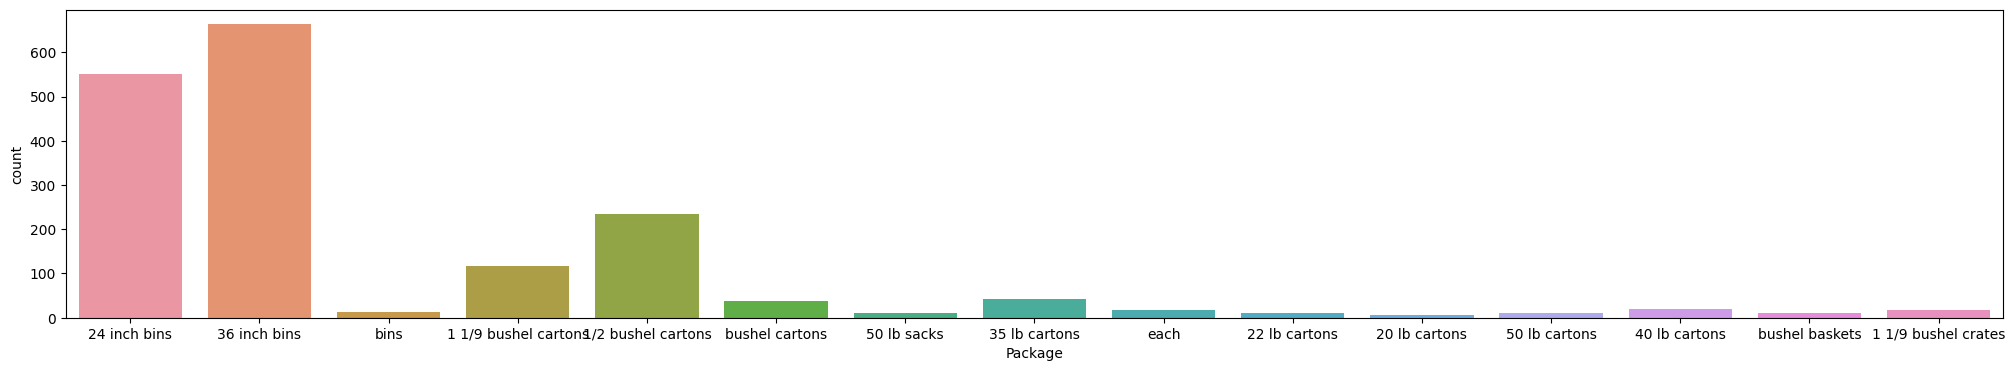

In [16]:
plt.rcParams['figure.figsize'] = (25,4)# Width and height of the figure in inches
sns.countplot(x=output_df['Package'])

<Axes: xlabel='Package', ylabel='Price'>

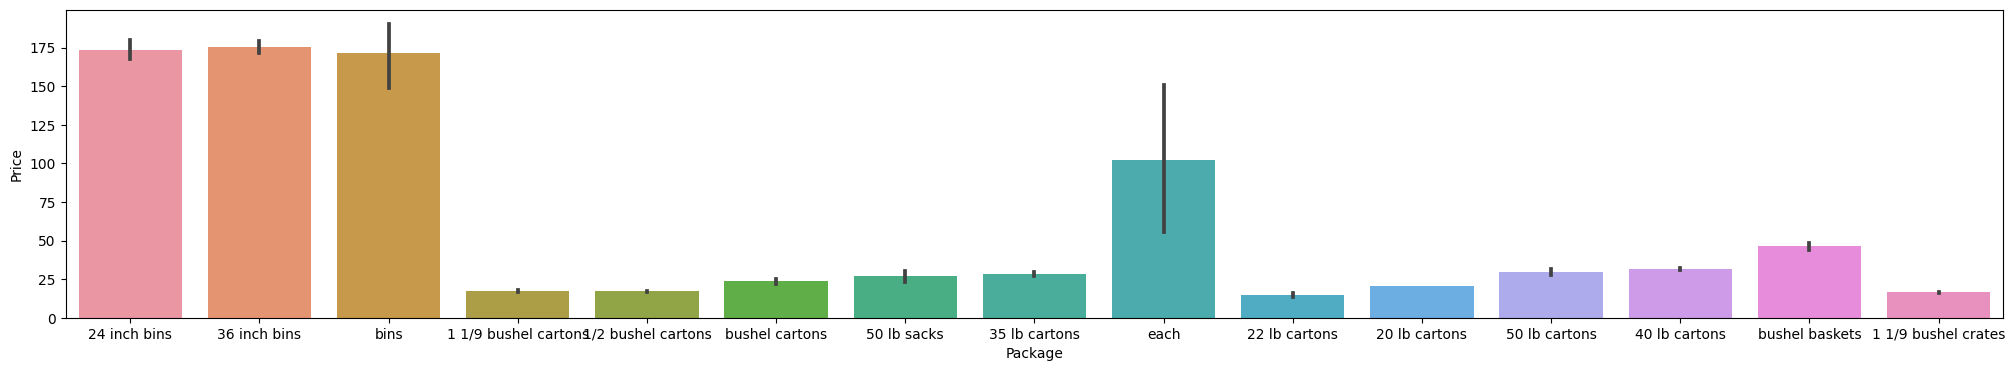

In [17]:
sns.barplot(x=output_df['Package'],y=output_df['Price'])

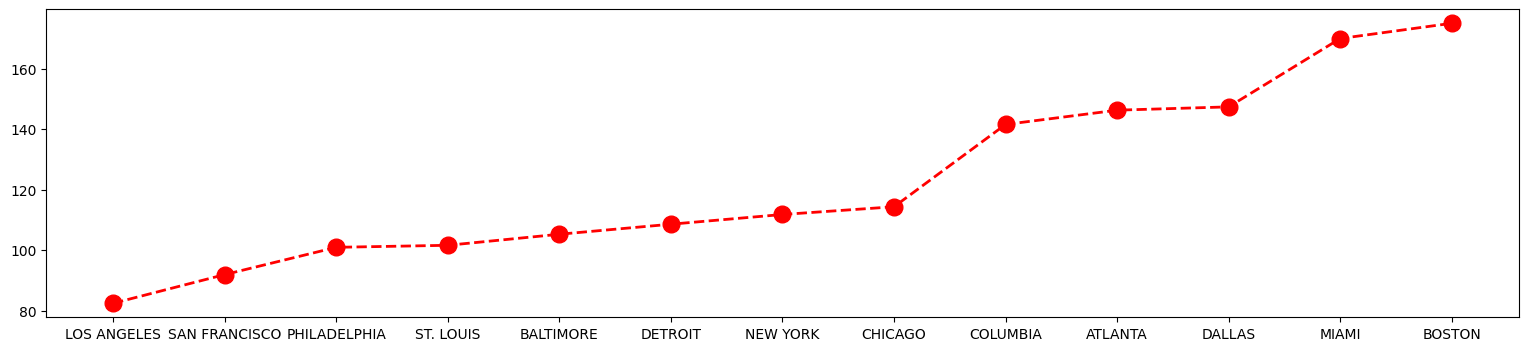

In [18]:
plt.figure(figsize=(19,4))
result= output_df[['City Name','Price']].groupby(by= ['City Name']).agg('mean').sort_values(by='Price',ascending=True)
plt.plot(result,color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12)

In [19]:
output_df['City Name'].value_counts()

City Name
BOSTON           352
COLUMBIA         263
CHICAGO          248
SAN FRANCISCO    166
BALTIMORE        153
DALLAS           137
NEW YORK         112
ST. LOUIS        103
LOS ANGELES       62
ATLANTA           57
PHILADELPHIA      57
DETROIT           44
MIAMI              3
Name: count, dtype: int64

In [20]:
output_df.query('`City Name` == "MIAMI"')


,Commodity Name,City Name,Package,Variety,Mostly Low,Mostly High,Origin,Item Size,Repack,year,month,day,Price
1023,PUMPKINS,MIAMI,36 inch bins,HOWDEN TYPE,120.0,120.0,MICHIGAN,jbo,N,2014,November,29,120.0
1024,PUMPKINS,MIAMI,36 inch bins,HOWDEN TYPE,160.0,160.0,MICHIGAN,lge,N,2014,November,29,160.0
1025,PUMPKINS,MIAMI,36 inch bins,PIE TYPE,230.0,230.0,MICHIGAN,NaN,N,2014,November,29,230.0


In [21]:
top_origin= [x for x in output_df['Origin'].value_counts().sort_values(ascending=False).head(12).index]
top_origin
for i in top_origin:
    output_df[i]= np.where(output_df['Origin']==i,1,0)
    

In [22]:
output_df.drop(columns=['Origin','Commodity Name'],inplace=True)

# Handling Missing Values:

In [23]:
output_df.isnull().mean()*100

City Name          0.000000
Package            0.000000
Variety            0.284576
Mostly Low         5.862265
Mostly High        5.862265
Item Size         15.879340
Repack             0.000000
year               0.000000
month              0.000000
day                0.000000
Price              0.000000
PENNSYLVANIA       0.000000
MICHIGAN           0.000000
CALIFORNIA         0.000000
MASSACHUSETTS      0.000000
ILLINOIS           0.000000
TEXAS              0.000000
OHIO               0.000000
CANADA             0.000000
MARYLAND           0.000000
NORTH CAROLINA     0.000000
VIRGINIA           0.000000
MEXICO             0.000000
dtype: float64

# Performing Random Sample Imputation:

In [24]:
output_df['High_imputed']=output_df['Mostly High']

In [25]:
output_df['High_imputed'][output_df['High_imputed'].isnull()]= output_df['Mostly High'].dropna().sample(output_df['Mostly High'].isnull().sum(),random_state=0).values

In [26]:
print(df['Mostly High'].var())
print(output_df['High_imputed'].var())

7822.158326939478
7917.018482030745


Text(0.5, 1.0, 'After imputation')

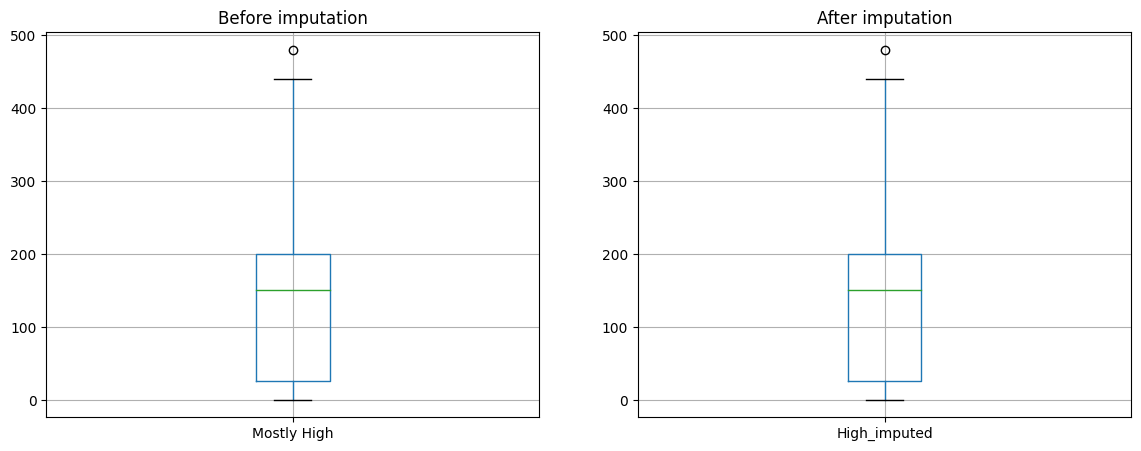

In [27]:
plt.figure(figsize=(14,5))
plt.subplot(121)
df[['Mostly High']].boxplot()
plt.title('Before imputation')

plt.subplot(122)
output_df[['High_imputed']].boxplot()
plt.title('After imputation')

In [28]:
output_df['Low_imputed']=output_df['Mostly Low']

In [29]:
output_df['Low_imputed'][output_df['Low_imputed'].isnull()]= output_df['Mostly Low'].dropna().sample(output_df['Mostly Low'].isnull().sum(),random_state=0).values

In [30]:
print(df['Mostly Low'].var())
print(output_df['Low_imputed'].var())

7484.3539338168985
7577.3334666960545


Text(0.5, 1.0, 'After imputation')

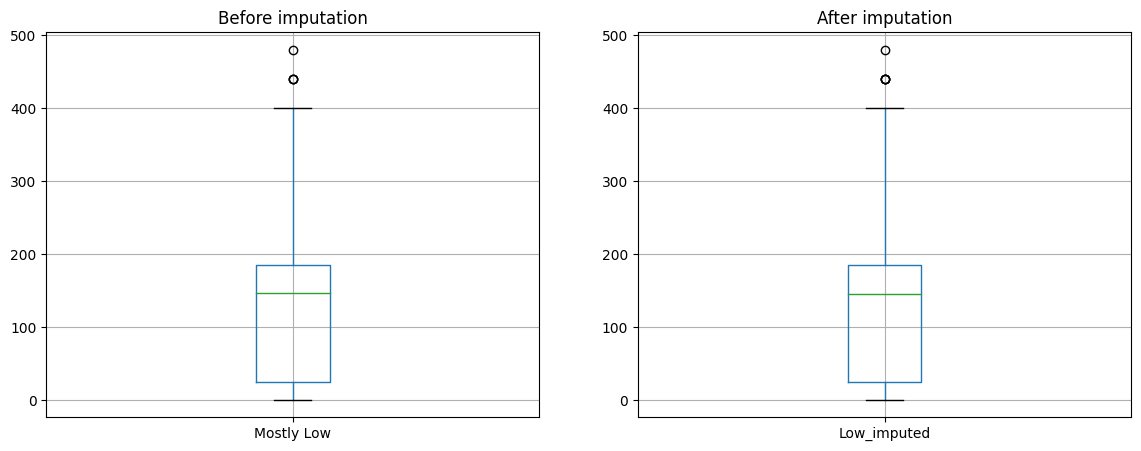

In [31]:
plt.figure(figsize=(14,5))
plt.subplot(121)
df[['Mostly Low']].boxplot()
plt.title('Before imputation')

plt.subplot(122)
output_df[['Low_imputed']].boxplot()
plt.title('After imputation')

# OUTLIERS :

In [32]:
output_df['High_imputed'].skew()

0.16275642645306868

In [33]:
percen_25= output_df['High_imputed'].quantile(0.25)
percen_75= output_df['High_imputed'].quantile(0.75)

In [34]:
IQR= percen_75- percen_25

In [35]:
upper= percen_75+1.5*IQR
lower= percen_25-1.5*IQR

In [36]:
output_df[output_df['High_imputed']>upper]

,City Name,Package,Variety,Mostly Low,Mostly High,Item Size,Repack,year,month,day,...,ILLINOIS,TEXAS,OHIO,CANADA,MARYLAND,NORTH CAROLINA,VIRGINIA,MEXICO,High_imputed,Low_imputed
1070,SAN FRANCISCO,24 inch bins,PIE TYPE,480.0,480.0,NaN,N,2016,October,15,...,0,0,0,0,0,0,0,0,480.0,480.0


In [37]:
output_df= output_df[output_df['High_imputed']<upper]

In [38]:
percen25= output_df['Low_imputed'].quantile(0.25)
percen75= output_df['Low_imputed'].quantile(0.75)

In [39]:
IQR= percen75-percen25
upper_low= percen75+1.5*IQR
lower_low= percen25-1.5*IQR

In [40]:
output_df[output_df['Low_imputed']>upper_low]

,City Name,Package,Variety,Mostly Low,Mostly High,Item Size,Repack,year,month,day,...,ILLINOIS,TEXAS,OHIO,CANADA,MARYLAND,NORTH CAROLINA,VIRGINIA,MEXICO,High_imputed,Low_imputed
726,ST. LOUIS,24 inch bins,HOWDEN TYPE,NaN,NaN,xlge,N,2016,September,26,...,1,0,0,0,0,0,0,0,440.0,440.0
1046,SAN FRANCISCO,24 inch bins,HOWDEN TYPE,440.0,440.0,lge,N,2016,October,22,...,0,0,0,0,0,0,0,0,440.0,440.0
1104,SAN FRANCISCO,36 inch bins,PIE TYPE,440.0,440.0,sml,N,2017,September,23,...,0,0,0,0,0,0,0,0,440.0,440.0
1105,SAN FRANCISCO,36 inch bins,PIE TYPE,440.0,440.0,sml,N,2017,September,30,...,0,0,0,0,0,0,0,0,440.0,440.0


In [41]:
output_df['Low_imputed']=np.where(output_df['Low_imputed']>upper_low,upper_low,
                                  np.where(output_df['Low_imputed']<lower_low,lower_low,output_df['Low_imputed'])) 

# Imputation on categorical data:

In [42]:
mode= output_df['Item Size'].mode()[0]
output_df['Item Size']=output_df['Item Size'].fillna(mode)

In [43]:
output_df['Item Size'].isnull().sum()

0

In [44]:
output_df.drop(columns=['Mostly High','Mostly Low'],inplace=True)

In [45]:
output_df.dropna(inplace=True)

In [46]:
output_df.isnull().sum()

City Name         0
Package           0
Variety           0
Item Size         0
Repack            0
year              0
month             0
day               0
Price             0
PENNSYLVANIA      0
MICHIGAN          0
CALIFORNIA        0
MASSACHUSETTS     0
ILLINOIS          0
TEXAS             0
OHIO              0
CANADA            0
MARYLAND          0
NORTH CAROLINA    0
VIRGINIA          0
MEXICO            0
High_imputed      0
Low_imputed       0
dtype: int64

# FEATURE ENGINEERING:

In [47]:
x= output_df.drop(columns=['Price'])
y= output_df['Price']

X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [48]:
X_train.columns

Index(['City Name', 'Package', 'Variety', 'Item Size', 'Repack', 'year',
       'month', 'day', 'PENNSYLVANIA', 'MICHIGAN', 'CALIFORNIA',
       'MASSACHUSETTS', 'ILLINOIS', 'TEXAS', 'OHIO', 'CANADA', 'MARYLAND',
       'NORTH CAROLINA', 'VIRGINIA', 'MEXICO', 'High_imputed', 'Low_imputed'],
      dtype='object')

In [52]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [53]:
transformer= ColumnTransformer(transformers=[
    ('trf1',OrdinalEncoder(categories=[['sml','med','med-lge','lge','xlge','jbo','exjbo']]),['Item Size']),
    ('trf2',OneHotEncoder(sparse=False,drop='first'),['City Name','Variety','month','Repack']),
    ('trf3',OrdinalEncoder(categories=[['36 inch bins', '24 inch bins','bins','1 1/9 bushel crates','50 lb sacks','bushel baskets',
                                        '1/2 bushel cartons', '1 1/9 bushel cartons', '35 lb cartons', 'bushel cartons',
                                       '40 lb cartons','50 lb cartons','22 lb cartons','20 lb cartons','each']]),['Package'])],remainder='passthrough')

In [54]:
transformer.set_output(transform='pandas')
X_train= transformer.fit_transform(X_train)


In [55]:
X_train

,trf1__Item Size,trf2__City Name_BALTIMORE,trf2__City Name_BOSTON,trf2__City Name_CHICAGO,trf2__City Name_COLUMBIA,trf2__City Name_DALLAS,trf2__City Name_DETROIT,trf2__City Name_LOS ANGELES,trf2__City Name_MIAMI,trf2__City Name_NEW YORK,...,remainder__ILLINOIS,remainder__TEXAS,remainder__OHIO,remainder__CANADA,remainder__MARYLAND,remainder__NORTH CAROLINA,remainder__VIRGINIA,remainder__MEXICO,remainder__High_imputed,remainder__Low_imputed
1328,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,150.0,140.0
1463,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,150.0,145.0
525,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,160.0,150.0
361,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,175.0,175.0
932,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,200.0,185.0
1549,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,15.0,15.0
562,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,15.0,15.0
334,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,150.0,150.0


In [56]:
X_test= transformer.transform(X_test)

# Applying Anova

In [70]:
from sklearn.feature_selection import f_regression, SelectKBest
fs = SelectKBest(score_func=f_regression,k=30)
fit = fs.fit(X_train,y_train)

In [71]:
X_train.columns[fs.get_support()]

Index(['trf1__Item Size', 'trf2__City Name_BALTIMORE',
       'trf2__City Name_BOSTON', 'trf2__City Name_COLUMBIA',
       'trf2__City Name_LOS ANGELES', 'trf2__City Name_SAN FRANCISCO',
       'trf2__City Name_ST. LOUIS', 'trf2__Variety_BLUE TYPE',
       'trf2__Variety_CINDERELLA', 'trf2__Variety_FAIRYTALE',
       'trf2__Variety_HOWDEN TYPE', 'trf2__Variety_KNUCKLE HEAD',
       'trf2__Variety_MINIATURE', 'trf2__Variety_MIXED HEIRLOOM VARIETIES',
       'trf2__month_July', 'trf2__month_June', 'trf2__month_November',
       'trf2__Repack_N', 'trf3__Package', 'remainder__year',
       'remainder__PENNSYLVANIA', 'remainder__MICHIGAN',
       'remainder__CALIFORNIA', 'remainder__MASSACHUSETTS', 'remainder__TEXAS',
       'remainder__OHIO', 'remainder__NORTH CAROLINA', 'remainder__MEXICO',
       'remainder__High_imputed', 'remainder__Low_imputed'],
      dtype='object')

In [72]:
X_train_trans=fs.transform(X_train)
X_test_trans=fs.transform(X_test)

# POLYNOMIAL REGRESSON

In [73]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [74]:
degree = 2

# Create polynomial features
poly = PolynomialFeatures(degree=degree)
X_train_trans1= poly.fit_transform(X_train_trans)
X_test_trans1=poly.transform(X_test_trans)
# Create and fit a polynomial regression model


In [75]:
lr= LinearRegression()
lr.fit(X_train_trans1,y_train)

LinearRegression()

In [76]:
from sklearn.metrics import r2_score
y_pred=lr.predict(X_test_trans1)
r2 = r2_score(y_test, y_pred)
r2

0.9857229810783806

In [77]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(lr,X_train_trans1,y_train))

0.981166511377551

In [78]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
rms

10.5021462003711

# Decision Tree Regressor

In [79]:
from sklearn.tree import DecisionTreeRegressor

In [80]:
DT=DecisionTreeRegressor()
DT.fit(X_train_trans1,y_train)
y_pred2=DT.predict(X_test_trans1)
r2 = r2_score(y_test, y_pred2)
r2

0.9791365662308842

In [81]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(DT,X_train_trans1,y_train))

0.9748206063250053

In [82]:
rms = sqrt(mean_squared_error(y_test, y_pred2))
rms

12.695569462389585

# RandomForestRegressor

In [83]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
rf=RandomForestRegressor(n_estimators= 100)
rf.fit(X_train_trans1,y_train)
y_pred3=rf.predict(X_test_trans1)
r2 = r2_score(y_test, y_pred3)
r2

0.9579264230881512

In [85]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(rf,X_train_trans1,y_train))

0.9719063257773627

In [260]:
rms = sqrt(mean_squared_error(y_test, y_pred3))
rms

14.341884292862105